In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from numpy import asarray
from PIL import Image

In [2]:
data_dir = 'C:\\Users\\DELL\\OneDrive\\Desktop\\ML\\TF\\cityscapes_data'
data_dir1 = 'C:\\Users\\DELL\\OneDrive\\Desktop\\ML\\TF\\cityscapes_data\\data'

In [3]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'data', 'train', 'val']

In [4]:
os.listdir(data_dir1)

['scene_test', 'scene_train']

In [5]:
from matplotlib.image import imread

In [6]:
train_path = data_dir+'\\train\\'
test_path = data_dir+'\\val\\'
scene_test_path = data_dir1+'\\scene_test\\'
scene_train_path = data_dir1+'\\scene_train\\'

In [ ]:
os.listdir(train_path)

In [7]:
im1 = train_path+'1.jpg'

In [8]:
im1

'C:\\Users\\DELL\\OneDrive\\Desktop\\ML\\TF\\cityscapes_data\\train\\1.jpg'

In [9]:
im1 = imread(im1)

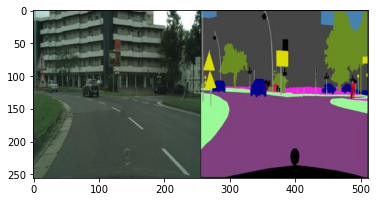

In [10]:
plt.imshow(im1)

In [11]:
#AS GIVEN IN THE QUESTION WE HAVE TO EXTRACT SCENE IMAGES FROM THE CONCATENATED IMAGE OF 
#SCENE AND SEGMENT IMAGES 
#ITERATING OVER ALL IMAGES AND APPLYING CROPPING PROCESS


In [12]:
for scene_im in os.listdir(test_path):
    #Create an Image Object from an Image
    im = Image.open(test_path+scene_im)
    cropped = im.crop((1,1,256,256))
    #Save the cropped image
    cropped.save(scene_test_path + scene_im )
    



In [13]:
for scen_im in os.listdir(train_path):
    #Create an Image Object from an Image
    im = Image.open(train_path+scen_im)
    cropped = im.crop((1,1,256,256))
    #Save the cropped image
    cropped.save(scene_train_path + scen_im )
    


In [15]:
len(os.listdir(scene_test_path))

500

In [16]:
len(os.listdir(scene_train_path))

2975

In [17]:
i = scene_train_path + '1.jpg'

In [18]:
r = plt.imread(i)

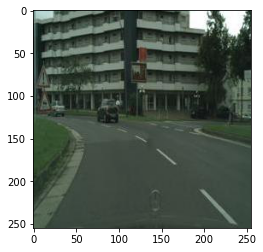

In [19]:
plt.imshow(r) #extracted only scene image 

In [20]:
# converting all images into gray scale from rgb
#for i in os.listdir(scene_train_path):
   # img = Image.open(scene_train_path + i)
    #imgGray = img.convert('L')
    #imgGray.save(scene_train_path + i)

In [21]:
import os
import csv
import sys
def ListofFiles(data_dir1 , format = 'jpg'):
    Files = []
    for root, dir_name, file_name in os.walk(data_dir1): 
       # root store address till directory, dir_name stores directory name # file_name stores file name
        for name in file_name:
             if name.endswith(format):
                fullName = os.path.join(root, name)
                Files.append(fullName)
    return Files

In [22]:
FileList = ListofFiles(data_dir1)
 

In [ ]:

for file in FileList:
    Im = Image.open(file)
    
    
    
    width, height = im.size
    format = im.format
    mode = im.mode

    # Make image Greyscale
    img_grey = im.convert('L')
   

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    
    with open("img_pixels.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(img_pixels.csv)
print(standardized_data.shape)



In [ ]:
#APPLYING PRINCIPAL COMPONENT ANALYSIS FOR DIMENTIONALITY REDUCTION
sample_data = standardized_data

# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)
pca_data